In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn import manifold

In [2]:
with open('../files/ls.json') as f:
    data_file = json.load(f)

In [14]:
data_filter = filter(lambda d: d['type'] == 'LoadConst' and d['params'] == 'edi', data_file)
_data = []
for d in data_filter:
    print(d)
    _data.append(d)

{'dest': 'edi', 'arch': 32, 'address': 16929, 'hex': '5fc3', 'address_end': 16930, 'disasm': 'pop edi; ret', 'stack_fix': 8, 'params': 'edi', 'retn': 0, 'offset': 0, 'modified_regs': ['edi'], 'type': 'LoadConst', 'mem': [[], True]}
{'dest': 'edi', 'arch': 32, 'address': 59869, 'hex': '5f0f45c2c3', 'address_end': 59873, 'disasm': 'pop edi; cmovne eax, edx; ret', 'stack_fix': 8, 'params': 'edi', 'retn': 0, 'offset': 0, 'modified_regs': ['eax', 'edi'], 'type': 'LoadConst', 'mem': [[], True]}
{'dest': 'edi', 'arch': 32, 'address': 16926, 'hex': '0f95c05fc3', 'address_end': 16930, 'disasm': 'setne al; pop edi; ret', 'stack_fix': 8, 'params': 'edi', 'retn': 0, 'offset': 0, 'modified_regs': ['eax', 'edi'], 'type': 'LoadConst', 'mem': [[], True]}
{'dest': 'edi', 'arch': 32, 'address': 16949, 'hex': '5f0f95c0c3', 'address_end': 16953, 'disasm': 'pop edi; setne al; ret', 'stack_fix': 8, 'params': 'edi', 'retn': 0, 'offset': 0, 'modified_regs': ['eax', 'edi'], 'type': 'LoadConst', 'mem': [[], Tru

In [4]:
data = pd.io.json.read_json(json.dumps(_data))
data

,address,address_end,arch,dest,disasm,hex,mem,modified_regs,offset,params,retn,stack_fix,type
0,16929,16930,32,edi,pop edi; ret,5fc3,"[[], True]",[edi],0,edi,0,8,LoadConst
1,59869,59873,32,edi,"pop edi; cmovne eax, edx; ret",5f0f45c2c3,"[[], True]","[eax, edi]",0,edi,0,8,LoadConst
2,16926,16930,32,edi,setne al; pop edi; ret,0f95c05fc3,"[[], True]","[eax, edi]",0,edi,0,8,LoadConst
3,16949,16953,32,edi,pop edi; setne al; ret,5f0f95c0c3,"[[], True]","[eax, edi]",0,edi,0,8,LoadConst
4,48721,48725,32,edi,pop edi; sete al; ret,5f0f94c0c3,"[[], True]","[eax, edi]",0,edi,0,8,LoadConst
5,16939,16941,32,edi,pop esi; pop edi; ret,5e5fc3,"[[], True]","[edi, esi]",4,edi,0,12,LoadConst
6,16358,16360,32,edi,pop edi; pop ebp; ret,5f5dc3,"[[], True]","[edi, ebp]",0,edi,0,12,LoadConst
7,47487,47491,32,edi,"xor eax, eax; pop esi; pop edi; ret",31c05e5fc3,"[[], True]","[eax, edi, esi]",4,edi,0,12,LoadConst
8,59868,59873,32,edi,"pop esi; pop edi; cmovne eax, edx; ret",5e5f0f45c2c3,"[[], True]","[eax, edi, esi]",4,edi,0,12,LoadConst
9,59913,59918,32,edi,"cmovne eax, edx; pop esi; pop edi; ret",0f45c25e5fc3,"[[], True]","[eax, edi, esi]",4,edi,0,12,LoadConst


In [5]:
data['mem'][13][0]

[]

In [6]:
data['modified_regs'][13]

['eax', 'edi', 'esi']

In [7]:
dissM=np.zeros((len(data),len(data))) #creates a zeros dissM
for i in range(len(data)):
    for j in range (len(data)):
        a1 = set(data['modified_regs'][i])
        b1 = set(data['modified_regs'][j])
        a2 = set(data['mem'][i][0])
        b2 = set(data['mem'][j][0])
        dissM[i][j]= len((a1 | b1) - (a1 & b1))# + len((a2 | b2) - (a2 & b2))

In [8]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed")
pos = mds.fit(dissM).embedding_

s = 50
plt.scatter(pos[:, 0], pos[:, 1], color='red',s=s, lw=0, label='Gadgets')

In [12]:
res = {'X':[], 'labels':[]}
for label, x, y in zip(data['modified_regs'], pos[:, 0], pos[:, 1]):
    res['X'].append({"x": x, "y": y})
    res['labels'].append(label)
json.dumps(res)

'{"X": [{"x": -1.3953762405290389, "y": -0.5700784435124695}, {"x": -0.26804156324389256, "y": 0.9710544211071837}, {"x": -0.26804156324389267, "y": 0.9710544211071831}, {"x": -0.2680415632438924, "y": 0.9710544211071831}, {"x": -0.2680415632438927, "y": 0.9710544211071835}, {"x": -0.213338696534371, "y": -0.9381974517693835}, {"x": -1.7194503856486394, "y": 0.3550740716071115}, {"x": 0.8612797626529496, "y": 0.03721657342671254}, {"x": 0.8612797626529497, "y": 0.037216573426712495}, {"x": 0.86127976265295, "y": 0.03721657342671249}, {"x": 0.8612797626529498, "y": 0.03721657342671245}, {"x": 0.8612797626529496, "y": 0.03721657342671254}, {"x": 0.8612797626529497, "y": 0.037216573426712495}, {"x": 0.86127976265295, "y": 0.03721657342671249}, {"x": 0.8612797626529498, "y": 0.03721657342671245}, {"x": 0.8612797626529496, "y": 0.03721657342671254}, {"x": 0.8612797626529497, "y": 0.037216573426712495}, {"x": 0.86127976265295, "y": 0.03721657342671249}, {"x": -0.6425197712664747, "y": -0.223

In [9]:
for label, x, y in zip(data['modified_regs'], pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.legend()

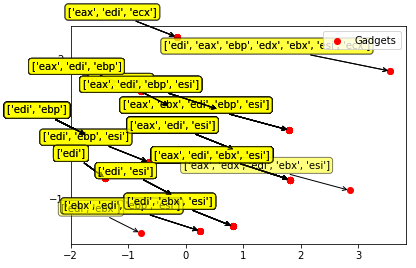

In [10]:
plt.show()